**Proyek Mandiri LSTM**

Import library

In [410]:
import numpy as np
import pandas as pd 
from google.colab import drive

from matplotlib import pyplot as plt
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.preprocessing.sequence import TimeseriesGenerator

from sklearn.metrics import mean_squared_error
from math import sqrt



In [411]:
pip install EMD-signal

In [412]:
from PyEMD import EMD

Load Dataset

In [413]:
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [414]:
path_train_dataset = 'gdrive/My Drive/S2/PML/proyek_mandiri/AAPL_train.csv'
df_train = pd.read_csv(path_train_dataset)
df = pd.read_csv(path_train_dataset)
# df_train = df_train[['open','high','low']]
df_train = df_train[['close']]


In [415]:
# df_train.tail()
df_train_target = df[['close']]

In [416]:
#load test set
path_test_dataset = 'gdrive/My Drive/S2/PML/proyek_mandiri/AAPL_test.csv'
df_test = pd.read_csv(path_test_dataset)
test_valid = df_test[['close']]
df_test_save = df_test
# df_test.head()
# df_test = df_test[['open','high','low']]
df_test = df_test[['close']]

In [417]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
977,2016-12-23,115.5900,116.5200,115.5900,116.5200,14249484,AAPL
978,2016-12-27,116.5200,117.8000,116.4900,117.2600,18296855,AAPL
979,2016-12-28,117.5200,118.0166,116.2000,116.7600,20905892,AAPL
980,2016-12-29,116.4500,117.1095,116.4000,116.7300,15039519,AAPL


In [418]:
import pylab as plt

In [419]:
a_list = list(range(0, 982))
print(a_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [420]:
data = df_train.values
data = data.reshape(982,)
pos = np.array(a_list)
print(data.shape)
print(pos.shape)

(982,)
(982,)


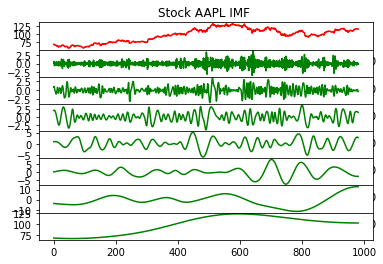

In [421]:
emd = EMD()
imfs = emd(data,pos)

N = imfs.shape[0]+1

plt.subplot(N,1,1)
plt.plot(pos, data, 'r')
plt.title("Stock AAPL IMF ")
plt.xlabel("Time [s]")

for n, imf in enumerate(imfs):
    plt.subplot(N,1,n+2)
    plt.plot(pos, imf, 'g')
    plt.subplots_adjust(hspace = .00001)
    # plt.title("IMF "+str(n+1))
    # plt.xlabel("Time [pos]")

# plt.tight_layout()
plt.savefig('simple_example')
plt.show()

In [422]:
N

8

In [423]:
# df_train_imf = pd.DataFrame(imfs[0], columns = ['close'])
#df_train_imf = pd.DataFrame(imfs[1], columns = ['close'])
# df_train_imf = pd.DataFrame(imfs[5], columns = ['close'])
idx = 6
df_train_imf = pd.DataFrame(imfs[idx], columns = ['close'])
print(df_train_imf)

          close
0     67.363180
1     67.323065
2     67.283624
3     67.244858
4     67.206766
..          ...
977  101.839607
978  101.837383
979  101.835680
980  101.834494
981  101.833820

[982 rows x 1 columns]


In [424]:
df_train = df_train_imf

In [425]:
df_test_save 

,date,open,high,low,close,volume,Name
0,2017-01-03,115.800,116.3300,114.7600,116.15,28781865,AAPL
1,2017-01-04,115.850,116.5100,115.7500,116.02,21118116,AAPL
2,2017-01-05,115.920,116.8642,115.8100,116.61,22193587,AAPL
3,2017-01-06,116.780,118.1600,116.4700,117.91,31751900,AAPL
4,2017-01-09,117.950,119.4300,117.9400,118.99,33561948,AAPL
...,...,...,...,...,...,...,...
272,2018-02-01,167.165,168.6200,166.7600,167.78,47230787,AAPL
273,2018-02-02,166.000,166.8000,160.1000,160.50,86593825,AAPL
274,2018-02-05,159.100,163.8800,156.0000,156.49,72738522,AAPL
275,2018-02-06,154.830,163.7200,154.0000,163.03,68243838,AAPL


In [426]:
# df_train

Preprocessing

In [427]:
#preproceesing training data
add = df_train[-7:]
test_data = add
test_data.reset_index()

test_data = test_data.append(df_test)
test_data

,close
975,101.845614
976,101.842351
977,101.839607
978,101.837383
979,101.835680
...,...
272,167.780000
273,160.500000
274,156.490000
275,163.030000


In [428]:
Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
Xscaler.fit(df_train)
scaled_X_train = Xscaler.transform(df_train)


In [429]:
scaled_X_train

array([[2.12197206e-02],
       [2.05112450e-02],
       [1.98146711e-02],
       [1.91300057e-02],
       [1.84572553e-02],
       [1.77964267e-02],
       [1.71475265e-02],
       [1.65105613e-02],
       [1.58855378e-02],
       [1.52724627e-02],
       [1.46713427e-02],
       [1.40821842e-02],
       [1.35049942e-02],
       [1.29397791e-02],
       [1.23865457e-02],
       [1.18453006e-02],
       [1.13160504e-02],
       [1.07988019e-02],
       [1.02935617e-02],
       [9.80033638e-03],
       [9.31913268e-03],
       [8.84995723e-03],
       [8.39281669e-03],
       [7.94771771e-03],
       [7.51466697e-03],
       [7.09367110e-03],
       [6.68473677e-03],
       [6.28787065e-03],
       [5.90307937e-03],
       [5.53036961e-03],
       [5.16974802e-03],
       [4.82122125e-03],
       [4.48479596e-03],
       [4.16047882e-03],
       [3.84827648e-03],
       [3.54819559e-03],
       [3.26024281e-03],
       [2.98442481e-03],
       [2.72074823e-03],
       [2.46921974e-03],


In [430]:
Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(df_train_target)
scaled_y_train = Yscaler.transform(df_train_target)
print(scaled_y_train.shape)
scaled_y_train = scaled_y_train.reshape(-1) # remove the second dimention from y so the shape changes from (n,1) to (n,)
print(scaled_y_train.shape)
 
scaled_y_train = np.insert(scaled_y_train, 0, 0)
scaled_y_train = np.delete(scaled_y_train, -1)

(982, 1)
(982,)


In [431]:
scaled_y_train

array([0.        , 0.15625287, 0.1654123 , 0.14315355, 0.1415061 ,
       0.140729  , 0.12883289, 0.12851816, 0.10790687, 0.10274433,
       0.11153334, 0.09671274, 0.10812834, 0.09998692, 0.0941224 ,
       0.07389966, 0.0546198 , 0.07514561, 0.06500315, 0.07410688,
       0.07621153, 0.08759087, 0.07012425, 0.0699766 , 0.07765564,
       0.0983032 , 0.12061764, 0.11834203, 0.11388277, 0.11508468,
       0.1320708 , 0.13515978, 0.13063835, 0.11388277, 0.0964537 ,
       0.07101273, 0.07264464, 0.07671147, 0.06881095, 0.06044805,
       0.06601727, 0.06744195, 0.08355772, 0.08104121, 0.07265889,
       0.05424938, 0.06607296, 0.02270299, 0.0028131 , 0.        ,
       0.0150615 , 0.0288641 , 0.02762851, 0.03302677, 0.04935624,
       0.07325207, 0.09667518, 0.09021877, 0.10174576, 0.10999727,
       0.12984959, 0.12605346, 0.13564158, 0.12256039, 0.11552893,
       0.11880441, 0.09867362, 0.07090135, 0.0814997 , 0.0790609 ,
       0.09695364, 0.09090262, 0.09403692, 0.09549139, 0.10106

In [432]:
n_input = 7 #how many samples/rows/timesteps to look in the past in order to forecast the next sample
n_features= df_train.shape[1] # how many predictors/Xs/features we have to predict y
b_size = 32 # Number of timeseries samples in each batch
#b_size = 64
generator = TimeseriesGenerator(scaled_X_train, scaled_y_train, length=n_input, batch_size=b_size)
 
print(generator[0][0].shape)

(32, 7, 1)


In [433]:
print(df_train.shape)

(982, 1)


Arsitektur LSTM

In [434]:
regressor = Sequential()
regressor.add(LSTM(units = 100, activation='relu',return_sequences = True, input_shape = (n_input, n_features)))
regressor.add(LSTM(units = 100,activation='relu'))
regressor.add(Dense(units = 1))
opt = keras.optimizers.Adam(learning_rate=0.001)
regressor.compile(optimizer=opt, loss='mse')
regressor.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 7, 100)            40800     
_________________________________________________________________
lstm_23 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [435]:
#  regressor.fit_generator(generator,epochs=40)
regressor.fit_generator(generator,epochs=40)
 # test 1 epoch 40
 # test 2 epoch 60

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


31/31 [==============================] - 4s 13ms/step - loss: 0.1818
Epoch 2/40
31/31 [==============================] - 0s 14ms/step - loss: 0.0149
Epoch 3/40
31/31 [==============================] - 0s 14ms/step - loss: 0.0265
Epoch 4/40
31/31 [==============================] - 0s 14ms/step - loss: 0.0093
Epoch 5/40
31/31 [==============================] - 0s 13ms/step - loss: 0.0148
Epoch 6/40
31/31 [==============================] - 0s 13ms/step - loss: 0.0098
Epoch 7/40
31/31 [==============================] - 0s 13ms/step - loss: 0.0117
Epoch 8/40
31/31 [==============================] - 0s 14ms/step - loss: 0.0101
Epoch 9/40
31/31 [==============================] - 0s 14ms/step - loss: 0.0104
Epoch 10/40
31/31 [==============================] - 0s 14ms/step - loss: 0.0083
Epoch 11/40
31/31 [==============================] - 0s 13ms/step - loss: 0.0074
Epoch 12/40
31/31 [==============================] - 0s 14ms/step - loss: 0.0125
Epoch 13/40
31/31 [=============================

In [436]:
scaled_X_test = Xscaler.transform(test_data)
test_generator = TimeseriesGenerator(scaled_X_test, np.zeros(len(test_data)), length=n_input, batch_size=b_size)
# print(test_generator[0][0].shape)

In [437]:
y_pred_scaled = regressor.predict(test_generator)
y_pred = Yscaler.inverse_transform(y_pred_scaled)

In [438]:
y_pred

array([[108.58636 ],
       [109.4698  ],
       [110.897026],
       [112.70141 ],
       [114.80086 ],
       [117.10112 ],
       [119.47423 ],
       [121.87232 ],
       [122.319824],
       [122.769936],
       [123.18114 ],
       [123.43761 ],
       [123.54825 ],
       [123.657814],
       [123.697464],
       [123.802246],
       [124.05071 ],
       [124.24462 ],
       [124.48656 ],
       [124.76199 ],
       [124.989914],
       [125.65505 ],
       [126.57817 ],
       [127.43719 ],
       [128.4723  ],
       [129.6862  ],
       [131.04425 ],
       [132.48161 ],
       [132.95453 ],
       [133.53749 ],
       [134.19217 ],
       [134.7962  ],
       [135.28975 ],
       [135.77058 ],
       [136.2893  ],
       [136.90979 ],
       [137.36493 ],
       [137.59563 ],
       [137.78044 ],
       [137.99518 ],
       [138.341   ],
       [138.6086  ],
       [138.91222 ],
       [139.31155 ],
       [139.70972 ],
       [140.03549 ],
       [140.2998  ],
       [140.1

In [439]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [440]:
print(test_valid)

      close
0    116.15
1    116.02
2    116.61
3    117.91
4    118.99
..      ...
272  167.78
273  160.50
274  156.49
275  163.03
276  159.54

[277 rows x 1 columns]


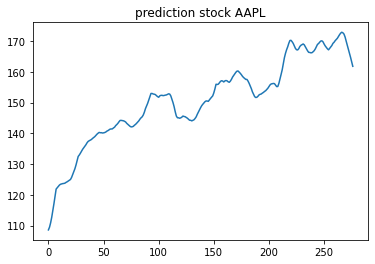

In [441]:
import matplotlib.pyplot as plt
plt.plot(y_pred)
plt.title('prediction stock AAPL')
plt.show()

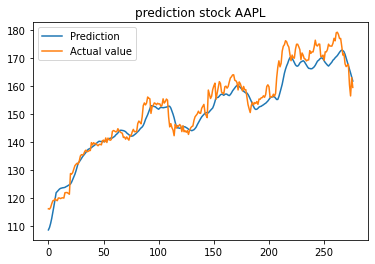

In [442]:
import matplotlib.pyplot as plt

plt.plot(y_pred, label = "Prediction")

# plotting the line 2 points 
plt.plot(test_valid, label = "Actual value")
# plt.xlabel('x - axis')
# Set the y axis label of the current axis.
# plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('prediction stock AAPL')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [443]:
# loss = keras.losses.mean_squared_error(test_valid, y_pred)
mse = mean_squared_error(test_valid, y_pred)
rmse = sqrt(mse)

In [444]:
print("mse = ",mse)
print("rmse = ",rmse)

mse =  16.019920115803394
rmse =  4.002489239935992
